In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("heights.csv")
df

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


In [76]:
lst = [] 
for i in np.arange(0.0,14.0,1.0):
    lst.append(i)
print(lst)

df['x'] = pd.DataFrame(lst)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]


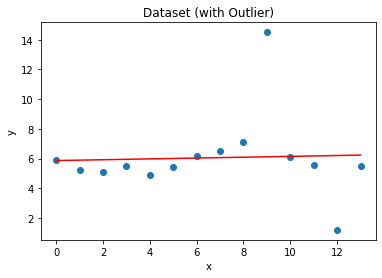

In [79]:
x = df['x']
y = df['height']
plt.scatter(x,y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset (with Outlier)')
plt.show()

In [7]:
df.shape

(14, 2)

<AxesSubplot:xlabel='height', ylabel='Count'>

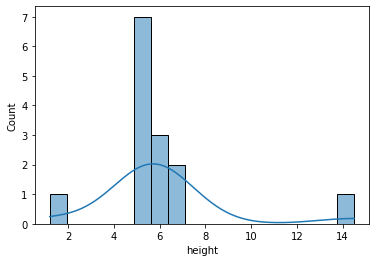

In [8]:
sns.histplot(df['height'], kde=True)

C:\Users\HP\Desktop\ML_Course\MachineLearning_Practices\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

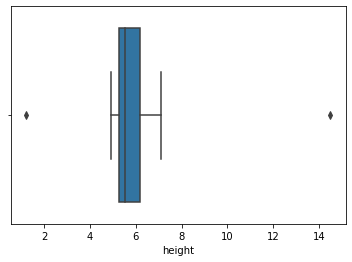

In [9]:
sns.boxplot(df['height'])

#### <h3 style='color:purple'>Detect outliers using percentile</h3>

In [10]:
max_thresold = df['height'].quantile(0.95)
max_thresold

9.689999999999998

In [11]:
df[df['height']>max_thresold]

,name,height
9,imran,14.5


In [12]:
min_thresold = df['height'].quantile(0.05)
min_thresold

3.6050000000000004

In [13]:
df[df['height']<min_thresold]

,name,height
12,yoseph,1.2


<h3 style='color:purple'>Remove outliers</h3>

In [14]:
df[(df['height']<max_thresold) & (df['height']>min_thresold)]

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


In [15]:
## Step-5: Finding upper and lower limit

upper_limit = df['height'].quantile(0.95)
lower_limit = df['height'].quantile(0.05)

upper_limit , lower_limit

(9.689999999999998, 3.6050000000000004)

In [16]:
new_df = df[(df['height'] <= 9.689999999999998) & (df['height'] >= 3.6050000000000004)]

C:\Users\HP\Desktop\ML_Course\MachineLearning_Practices\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

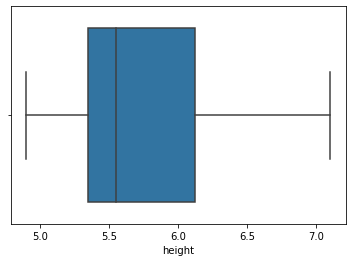

# Using IQR

In [42]:
df1 = pd.read_csv("heights.csv")
df1

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


<AxesSubplot:xlabel='height', ylabel='Count'>

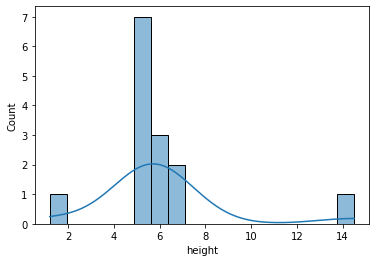

In [43]:
sns.histplot(df['height'], kde=True)

In [44]:
#detect outliers based on weight
Q1 = df1.height.quantile(0.25)
Q3 = df1.height.quantile(0.75)
Q1, Q3

IQR = Q3 - Q1
print(IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

0.9249999999999998


(3.8625000000000003, 7.5625)

In [45]:
new_df= df[(df.height>lower_limit)&(df.height<upper_limit)]
new_df

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


C:\Users\HP\Desktop\ML_Course\MachineLearning_Practices\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

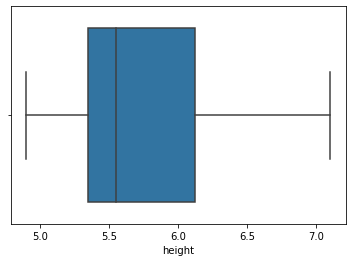

In [46]:
sns.boxplot(new_df['height'])

<AxesSubplot:xlabel='height', ylabel='Count'>

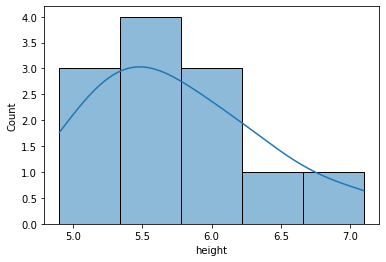

In [47]:
sns.histplot(new_df['height'], kde=True)

# Using Z-Score

In [26]:
df2 = pd.read_csv("heights.csv")
df2.head()

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9


In [50]:
df2.height.mean()

6.05

In [51]:
df2.height.std()

2.779803534839772

In [48]:
df2['zscore'] = (df2.height - df2.height.mean() ) / df2.height.std()
df2

,name,height,zscore
0,mohan,5.9,-0.053961
1,maria,5.2,-0.305777
2,sakib,5.1,-0.341751
3,tao,5.5,-0.197856
4,virat,4.9,-0.413698
5,khusbu,5.4,-0.233829
6,dmitry,6.2,0.053961
7,selena,6.5,0.161882
8,john,7.1,0.377725
9,imran,14.5,3.039783


In [30]:
df2[df2['zscore']>3]

,name,height,zscore
9,imran,14.5,3.039783


In [32]:
df2[df2['zscore']<-3]

,name,height,zscore


In [34]:
df2[(df2.zscore<-3) | (df2.zscore>3)]

,name,height,zscore
9,imran,14.5,3.039783


In [37]:
#Remove the outliers and produce new dataframe

df_no_outliers = df2[(df2.zscore>-3) & (df2.zscore<3)]
df_no_outliers.head()

,name,height,zscore
0,mohan,5.9,-0.053961
1,maria,5.2,-0.305777
2,sakib,5.1,-0.341751
3,tao,5.5,-0.197856
4,virat,4.9,-0.413698


In [38]:
df_no_outliers.shape

(13, 3)

In [39]:
df2.shape

(14, 3)